# Homework 11: Clustering
### Due Saturday, April 22, 11:59 PM

This homework is based on the materials covered in week 11 and 12 about clustering algorithms. 

You will work with a dataset containing Healthy Lifestyle metrics of 44 cities. The goal is to build clustering models to identify clusters containing similar cities. The original data source is from [https://www.lenstore.co.uk/research/healthy-lifestyle-report/]. For each city, the following metrics are reported:
- Sunshine hours(City)
- Cost of a bottle of water(City)
- Obesity levels(Country)
- Life expectancy(years) (Country)
- Pollution(Index score) (City)
- Annual avg. hours worked
- Happiness levels(Country)
- Outdoor activities(City)
- Number of take out places(City)
- Cost of a monthly gym membership(City)

Please use Python as the coding language. You are free to use existing Python libraries. Please make sure your codes can run successfully, no points will be given for a question if the code fails to run. 

### Preparation: load dataset
Download the dataset 'city_lifestyle.csv' and store it in the same folder as this Jupyter notebook. Use the following codes to load the dataset.

In [63]:
import pandas as pd
import numpy as np

df = pd.read_csv('city_lifestyle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


### Q1. Prepare the dataset for clustering (4 points)
From the output from `df.info()`, we observe that not all columns are in numeric formats. For example, 'Cost of a bottle of water(City)' contain monetary values. To prepare the dataset for clustering, complete the following steps.

(1) Rename column names to: City, Rank, SunHours, CostBottleWater, ObsLevel, LifeExpYr, Pollution, AnnualHourWork, Happiness, OutdoorAct, NumTakeOutPlaces, CostMonthGym (0.5 point)

(2) Transform all columns except 'City' to numeric values, namely, a float or an integer. In some columns, there are missing values indicated with '-', you should replace these missing values with the mean of the other values. (3 points)

(3) Create a new dataframe containing the transformed numeric values and with the 'City' column removed. You will use this dataframe in Q2 and Q3 (0.5 point)

In [64]:
# Use this cell to write code for Q1

# Part 1: Rename column names
df.rename(columns={
    'City': 'City',
    'Rank': 'Rank',
    'Sunshine hours(City)': 'SunHours',
    'Cost of a bottle of water(City)': 'CostBottleWater',
    'Obesity levels(Country)': 'ObsLevel',
    'Life expectancy(years) (Country)': 'LifeExpYr',
    'Pollution(Index score) (City)': 'Pollution',
    'Annual avg. hours worked': 'AnnualHourWork',
    'Happiness levels(Country)': 'Happiness',
    'Outdoor activities(City)': 'OutdoorAct',
    'Number of take out places(City)': 'NumTakeOutPlaces',
    'Cost of a monthly gym membership(City)': 'CostMonthGym'
}, inplace=True)
df.columns


Index(['City', 'Rank', 'SunHours', 'CostBottleWater', 'ObsLevel', 'LifeExpYr',
       'Pollution', 'AnnualHourWork', 'Happiness', 'OutdoorAct',
       'NumTakeOutPlaces', 'CostMonthGym'],
      dtype='object')

In [71]:
#Q1(2)
#(2) Transform columns to numeric values and handle missing values
numeric_columns = ['Rank', 'SunHours', 'CostBottleWater', 'ObsLevel', 'LifeExpYr', 'Pollution',
                   'AnnualHourWork', 'Happiness', 'OutdoorAct', 'NumTakeOutPlaces', 'CostMonthGym']

for col in numeric_columns:
    # Replace '-' with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Replace missing values with the mean of the other values in the column
    df[col].fillna(df[col].mean(), inplace=True)


# Display the updated DataFrame
df.head()




,City,Rank,SunHours,CostBottleWater,ObsLevel,LifeExpYr,Pollution,AnnualHourWork,Happiness,OutdoorAct,NumTakeOutPlaces,CostMonthGym
0,Amsterdam,1,1858.0,NaN,NaN,81.2,30.93,1434.0,7.44,422,1048,NaN
1,Sydney,2,2636.0,NaN,NaN,82.1,26.86,1712.0,7.22,406,1103,NaN
2,Vienna,3,1884.0,NaN,NaN,81.0,17.33,1501.0,7.29,132,1008,NaN
3,Stockholm,4,1821.0,NaN,NaN,81.8,19.63,1452.0,7.35,129,598,NaN
4,Copenhagen,5,1630.0,NaN,NaN,79.8,21.24,1380.0,7.64,154,523,NaN


In [72]:
#Q1(3)
# Create a new dataframe with transformed numeric values and 'City' column removed
numeric_df = df.drop('City', axis=1)

# Display the updated DataFrame
numeric_df.head()


,Rank,SunHours,CostBottleWater,ObsLevel,LifeExpYr,Pollution,AnnualHourWork,Happiness,OutdoorAct,NumTakeOutPlaces,CostMonthGym
0,1,1858.0,NaN,NaN,81.2,30.93,1434.0,7.44,422,1048,NaN
1,2,2636.0,NaN,NaN,82.1,26.86,1712.0,7.22,406,1103,NaN
2,3,1884.0,NaN,NaN,81.0,17.33,1501.0,7.29,132,1008,NaN
3,4,1821.0,NaN,NaN,81.8,19.63,1452.0,7.35,129,598,NaN
4,5,1630.0,NaN,NaN,79.8,21.24,1380.0,7.64,154,523,NaN


### Q2. Hierarchical clustering and visualization (3 points)

(1) Generate the complete Dendrogram for complete linkage based agglomerative hierarchical clustering. Hint: use a function from `scipy.cluster`. (1 point)

(2) Build a average linkage based agglomerative hierarchical clustering model with 2 clusters. Hint: use a function from `sklearn.cluster`. (1 point)

(3) Visualize the clustering result from (2): use 'LifeExpYr' on x-axis (horizontal axis), 'Happiness' on y-axis (vertical axis), and use the cluster labels for coloring. (1 point)

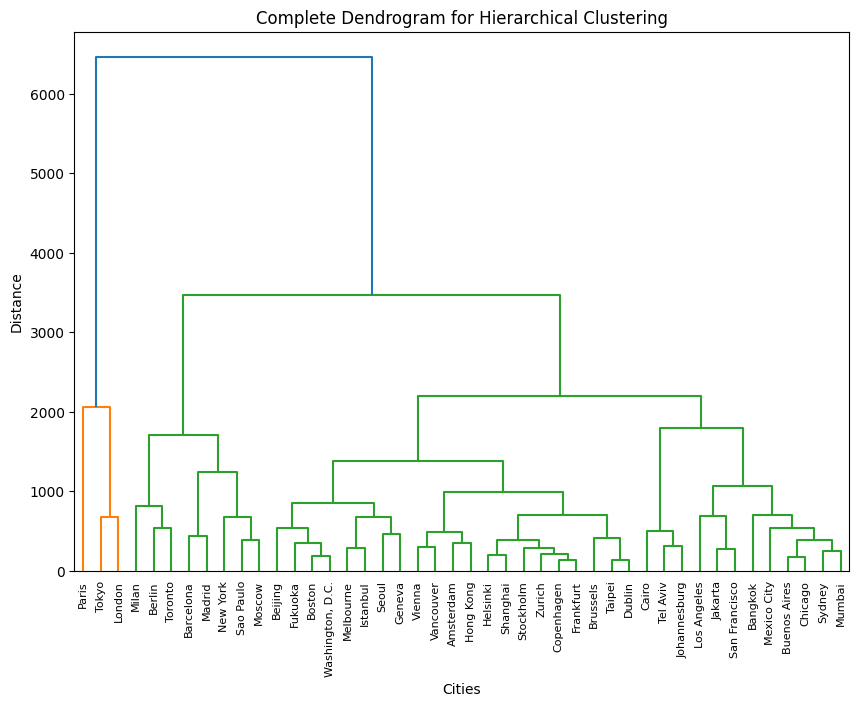

In [82]:
# set up for plotting
import matplotlib.pyplot as plt

# Assuming 'numeric_df' is the DataFrame from Q1 with numeric values and 'City' removed
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Replace any remaining NaN values with a large value
numeric_df.replace(np.nan, 1e6, inplace=True)

# Reset the index to include city names
numeric_df_reset = numeric_df.reset_index(drop=True)

# Set the size of the figure
plt.figure(figsize=(10, 7))

# Calculate the linkage matrix
linkage_matrix = linkage(numeric_df_reset, method='complete')

# Generate the complete dendrogram
dendrogram(linkage_matrix, labels=df['City'].tolist(), orientation='top', leaf_rotation=90, leaf_font_size=8)

# Add labels and title
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.title('Complete Dendrogram for Hierarchical Clustering')

# Display the dendrogram
plt.show()



In [83]:
# Use this cell to write code for Q2(2)
from sklearn.cluster import AgglomerativeClustering

# Assuming 'numeric_df' is the DataFrame from Q1 with numeric values and 'City' removed

# Create an instance of AgglomerativeClustering
# n_clusters is set to 2 to create 2 clusters
# linkage is set to 'average' for average linkage
model = AgglomerativeClustering(n_clusters=2, linkage='average')

# Fit the model and obtain cluster labels
cluster_labels = model.fit_predict(numeric_df)

# Add the cluster labels to the DataFrame
numeric_df['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(numeric_df.head())


   Rank  SunHours  CostBottleWater   ObsLevel  LifeExpYr  Pollution  \
0     1    1858.0        1000000.0  1000000.0       81.2      30.93   
1     2    2636.0        1000000.0  1000000.0       82.1      26.86   
2     3    1884.0        1000000.0  1000000.0       81.0      17.33   
3     4    1821.0        1000000.0  1000000.0       81.8      19.63   
4     5    1630.0        1000000.0  1000000.0       79.8      21.24   

   AnnualHourWork  Happiness  OutdoorAct  NumTakeOutPlaces  CostMonthGym  \
0          1434.0       7.44         422              1048     1000000.0   
1          1712.0       7.22         406              1103     1000000.0   
2          1501.0       7.29         132              1008     1000000.0   
3          1452.0       7.35         129               598     1000000.0   
4          1380.0       7.64         154               523     1000000.0   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


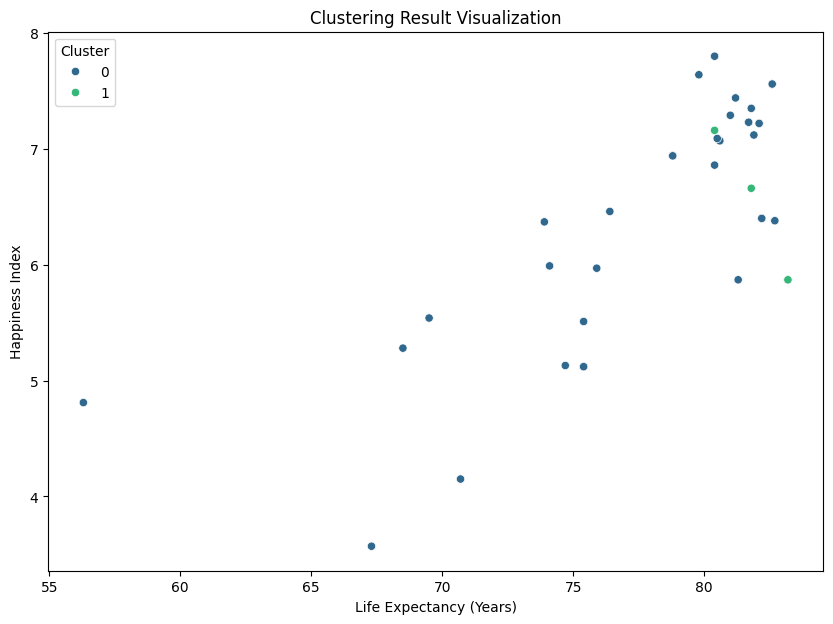

In [84]:
# Use this cell to write code for Q2(3)
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(10, 7))

# Create a scatter plot
sns.scatterplot(x='LifeExpYr', y='Happiness', hue='Cluster', data=numeric_df, palette='viridis')

# Add labels and title
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Happiness Index')
plt.title('Clustering Result Visualization')

# Display the legend
plt.legend(title='Cluster')

# Show the plot
plt.show()


### Q3. K-Means clustering and visualization (3 points)

(1) Build a K-Means clustering model with 4 clusters. (2 points)

(2) Visualize the new clustering result: use 'LifeExpYr' on x-axis (horizontal axis), 'Happiness' on y-axis (vertical axis), and use the cluster labels for coloring. (1 point)

In [85]:
# Use this cell to write code for Q3(1)
from sklearn.cluster import KMeans

# Assuming 'numeric_df' is the DataFrame from Q1 with numeric values and 'City' removed

# Create an instance of KMeans
# n_clusters is set to 4 to create 4 clusters
model_kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model and obtain cluster labels
cluster_labels_kmeans = model_kmeans.fit_predict(numeric_df)

# Add the cluster labels to the DataFrame
numeric_df['Cluster_KMeans'] = cluster_labels_kmeans

# Display the DataFrame with K-Means cluster labels
print(numeric_df.head())


c:\Users\chana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Rank  SunHours  CostBottleWater   ObsLevel  LifeExpYr  Pollution  \
0     1    1858.0        1000000.0  1000000.0       81.2      30.93   
1     2    2636.0        1000000.0  1000000.0       82.1      26.86   
2     3    1884.0        1000000.0  1000000.0       81.0      17.33   
3     4    1821.0        1000000.0  1000000.0       81.8      19.63   
4     5    1630.0        1000000.0  1000000.0       79.8      21.24   

   AnnualHourWork  Happiness  OutdoorAct  NumTakeOutPlaces  CostMonthGym  \
0          1434.0       7.44         422              1048     1000000.0   
1          1712.0       7.22         406              1103     1000000.0   
2          1501.0       7.29         132              1008     1000000.0   
3          1452.0       7.35         129               598     1000000.0   
4          1380.0       7.64         154               523     1000000.0   

   Cluster  Cluster_KMeans  
0        0               3  
1        0               0  
2        0               3  


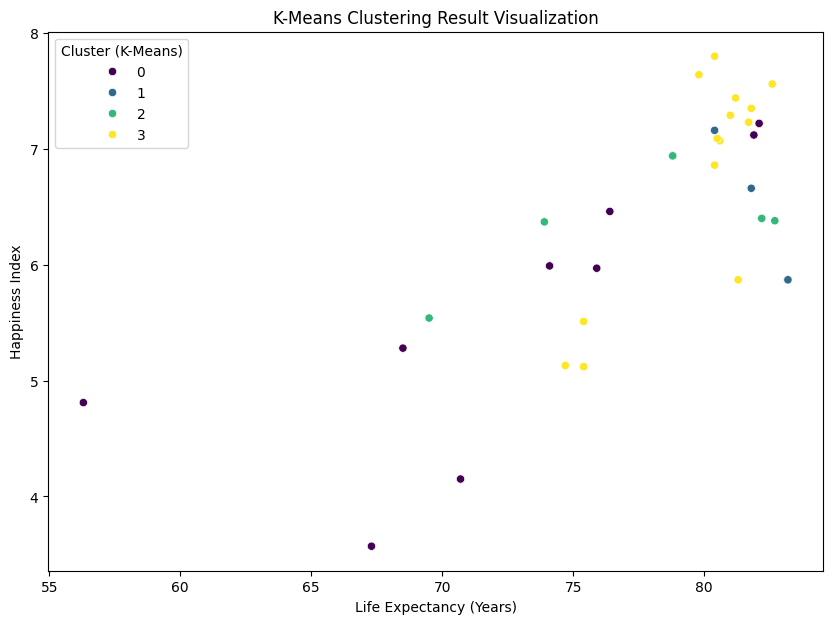

In [86]:
# Use this cell to write code for Q3(2)
# Set the size of the figure
plt.figure(figsize=(10, 7))

# Create a scatter plot for K-Means clustering result
sns.scatterplot(x='LifeExpYr', y='Happiness', hue='Cluster_KMeans', data=numeric_df, palette='viridis')

# Add labels and title
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Happiness Index')
plt.title('K-Means Clustering Result Visualization')

# Display the legend
plt.legend(title='Cluster (K-Means)')

# Show the plot
plt.show()
